# IRIS-Flower-classification

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit. 
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя. 

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

В качестве задания вам предлагается повторить данные действия по классификации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [1]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns 
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#метрики
from sklearn import metrics
#Наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

In [2]:
# читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [4]:
# Выделим признаки и результат
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = data['species'].unique()

# Наивный байесовский классификатор

Пусть все компоненты случайной величины $X=(X_1,\dots,X_d)$ дискретны, т. е. все признаки номинальны


$$
{\rm Pr}\,\{Y = y \mid X = x\} = \frac{{\rm Pr}\,\{X = x\mid Y = y\} \cdot{\rm Pr}\,\{Y = y\}}{{\rm Pr}\,\{X = x\}}
=
$$
$$
=
\frac{{\rm Pr}\,\{X = x\mid Y = y\} \cdot{\rm Pr}\,\{Y = y\}}{\sum_{y'} {\rm Pr}\,\{X = x\mid Y = y'\} \cdot{\rm Pr}\,\{Y = y'\}}
$$


_Основное предположение наивного байесовского классификатора:_

переменные $X_1,\dots, X_d$ _условно независимы_ при любом заданном $Y=y$, 
т. е.

$$
{\rm Pr}\,\{X_1=x_1,\dots, X_d=x_d \mid Y=y\} = {\rm Pr}\,\{X_1 = x_1 \mid Y=y\}\cdot\dots\cdot {\rm Pr}\,\{X_d = x_d \mid Y=y\},
$$

или, короче,
$$
{\rm Pr}\,\{X=x \mid Y=y\} = \prod_{j=1}^d {\rm Pr}\,\{X_j = x_j \mid Y=y\}.
$$

По принципу максимума апостериорной вероятности
$$
f(x) = {\rm argmax}_y {\rm Pr}\,\{Y=y\mid X=x\} 
= {\rm argmax}_y \left({\rm Pr}\,\{Y=y\}\cdot \prod_{j=1}^d {\rm Pr}\,\{X_j = x_j \mid Y=y\}\right).
$$

Вероятности заменяем частотой:


$$
{\rm Pr}\,\{Y = y\} \approx \frac{1}{N} |\{i:~y^{(i)} = y\}|,
\qquad
{\rm Pr}\,\{X_j = x_j \mid Y = y\} \approx \frac{|\{i:~{x_j^{(i)} = x_j, y^{(i)} = y}\}|}{|\{i:~y^{(i)} = y\}|}.
$$



In [5]:
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)

In [6]:
#Выполняем предсказание
y_pred=mod_gnb_all.predict(X_test)

print('accuracy (точность) классификатора ',metrics.accuracy_score(y_pred,y_test))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора  0.9333333333333333
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  3 17]]


In [7]:
# Использование построенной модели для предсказания класса
new_iris=[1.3, 2.4, 5.6, 3.5]
y_new_iris=mod_gnb_all.predict([new_iris])

print(y_new_iris)

['Iris-virginica']


# Повторяем действия для Wine Quality Data Set

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
data = pd.concat([X, y], axis=1)

# variable information 
display(wine_quality.variables) 
data.head(5)

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


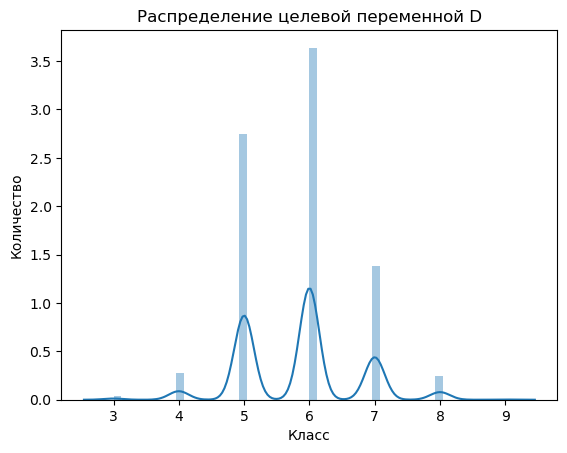

In [9]:
sns.distplot(data['quality'])
plt.title('Распределение целевой переменной D')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

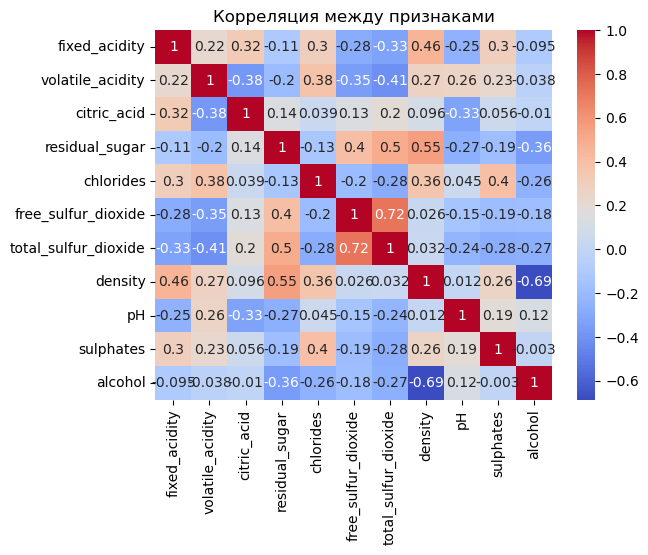

In [10]:
corr = data[list(X.columns)].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

In [11]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['quality'], random_state = 42)

In [12]:
# Выделим признаки и результат
X_train = train[list(X.columns)]
y_train = train.quality
X_test = test[list(X.columns)]
y_test = test.quality

fn = list(X.columns)
cn = data['quality'].unique()

In [13]:
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)

accuracy (точность) классификатора  0.42939592150827244


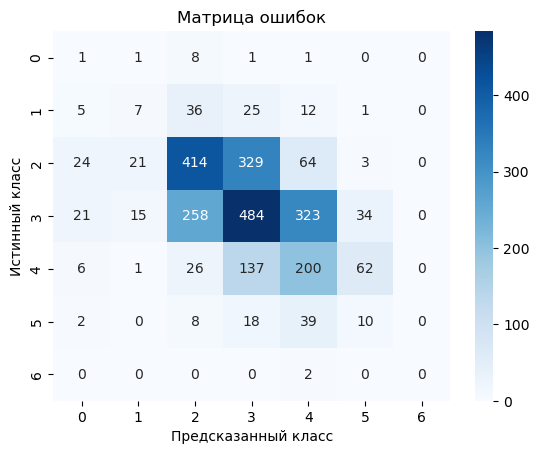

In [14]:
#Выполняем предсказание
y_pred=mod_gnb_all.predict(X_test)

print('accuracy (точность) классификатора ', metrics.accuracy_score(y_pred, y_test))

# матрица ошибок
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

In [15]:
new_wine = [7.7, 0.25, 0.2, 6, 0.05, 33, 161, 0.995, 3.1, 0.4, 11]
y_new_wine = mod_gnb_all.predict([new_wine])

print(y_new_wine)

[6]


In [16]:
data[data.index == 3630]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3630,7.6,0.29,0.26,6.5,0.042,32.0,160.0,0.9944,3.14,0.47,10.7,5
